# Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
! pip install catboost

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

Описание столбцов для train и test: 

● id - уникальный идентификатор столбца; 

● ticket_id - уникальный идентификатор билета, считается, что у одного билета один владелец 

● ticket_type_nm - тип билета 

● entrance_id - уникальный id входа в станцию 

● entrance_nm - название 

● station_id - уникальное id станции захода 

● station_nm - наименование станции захода 

● line_id - уникальный id ветки на которой находится станция 

● line_nm - наименование ветки на которой находится станция 

● pass_dttm - дата валидации 

● time_to_under (столбец для предсказания) - сколько времени прошло между первой и второй валидацией

● label (столбец для предсказания) - id второй станции, на которой произошла валидация

In [5]:
df = pd.read_csv('C:\\Users\\timur\\Documents\\ML Course\\train_dataset_train.csv')
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091021 entries, 0 to 1091020
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1091021 non-null  int64  
 1   ticket_id       1091021 non-null  object 
 2   ticket_type_nm  1091021 non-null  object 
 3   entrance_id     1091021 non-null  int64  
 4   entrance_nm     1091021 non-null  object 
 5   station_id      1091021 non-null  int64  
 6   station_nm      1091021 non-null  object 
 7   line_id         1091021 non-null  int64  
 8   line_nm         1091021 non-null  object 
 9   pass_dttm       1091021 non-null  object 
 10  time_to_under   1091021 non-null  float64
 11  label           1091021 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 99.9+ MB


Отобразим размер датасета и его колонки:

In [7]:
print(df.shape)
df.columns

(1091021, 12)


Index(['id', 'ticket_id', 'ticket_type_nm', 'entrance_id', 'entrance_nm',
       'station_id', 'station_nm', 'line_id', 'line_nm', 'pass_dttm',
       'time_to_under', 'label'],
      dtype='object')

Избавимся от entrance_id, station_id, line_id, т.к. эти строчки дублируют информацию в соответствующих им строках с названием. 

In [8]:
df = df.drop(['id', 'ticket_id', 'entrance_id', 'station_id', 'line_id', 'entrance_nm'], axis=1)

Посмотрим, нет ли в данных пропусков

In [9]:
df.isna().sum()

ticket_type_nm    0
station_nm        0
line_nm           0
pass_dttm         0
time_to_under     0
label             0
dtype: int64

Преобразуем колонку с временем входа

In [10]:
df.pass_dttm = pd.to_datetime(df.pass_dttm)
df

,ticket_type_nm,station_nm,line_nm,pass_dttm,time_to_under,label
0,Пропуск FacePay,Лефортово,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,СК учащегося 30 дней,Войковская,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,БСК дружинника г.Москвы,Войковская,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,30 дней,Войковская,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,КОШЕЛЕК,Войковская,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017
...,...,...,...,...,...,...
1091016,Пропуск FacePay,Нижегородская,Некрасовская,2022-09-19 02:54:50,124.750000,15005
1091017,Пропуск FacePay,Калужская,Калужско-Рижская,2022-09-19 03:06:02,56.066667,6007
1091018,Пропуск FacePay,Каширская,Замоскворецкая,2022-09-19 03:17:00,91.283333,2010
1091019,Пропуск FacePay,Воронцовская,Большая кольцевая,2022-09-19 03:23:30,47.900000,11014


In [11]:
df['dayofweek'] = df.pass_dttm.dt.weekday
df['hour'] = df.pass_dttm.dt.hour
df = df.drop(['pass_dttm'], axis=1)

In [12]:
df.ticket_type_nm.unique()

array(['Пропуск FacePay', 'СК учащегося 30 дней',
       'БСК дружинника г.Москвы', '30 дней', 'КОШЕЛЕК',
       'СК студента 30 дней', '90 дней', '90 дней ЕДИНЫЙ ТК',
       '30 дней СК учащегося', '90 дней СК студента',
       '30 дней СК студента', 'ББК', 'СК аспиранта 90 дней',
       'Социальная карта москвича', '30 дней ЕДИНЫЙ ТК',
       'Социальная карта жителя Моск. области', '30 дней Пригород ТК',
       'Социальная карта москвича с сопровождающим',
       'Пропуск сотрудника УВД по охране Метрополитена',
       '60 поездок ЕДИНЫЙ ТК', 'СК для сотрудника ГУВД г.Москвы',
       '365 дней ЕДИНЫЙ ТК', 'ВЕСБ МОСКВА (7мин)', 'СК студента 90 дней',
       '90 дней Пригород ТК', '30 дней  Пригород', '365 дней Пригород ТК',
       '365 дней', 'СК ординатора 30 дней', '30 дней СК аспиранта',
       '30 дней СК ординатора', '90 дней СК ординатора',
       'ВЕСБ МО (7 мин)', 'ВЕСБ МО (тип 5)', 'СК ординатора 90 дней',
       'СК аспиранта 30 дней', '90 дней СК учащегося',
       'Времен

In [13]:
df[df.ticket_type_nm == 'Пропуск сотрудника УВД по охране Метрополитена']
df[df.ticket_type_nm == 'Пропуск руководителя метрополитена']
df[df.ticket_type_nm == 'Пропуск  сотрудника МЦК']
# df.loc[df.ticket_type_nm.isin()]

,ticket_type_nm,station_nm,line_nm,time_to_under,label,dayofweek,hour
23686,Пропуск сотрудника МЦК,Верхние Котлы,Московское центральное кольцо,781.433333,14002,0,7
32990,Пропуск сотрудника МЦК,Стрешнево,Московское центральное кольцо,386.716667,14025,0,7
58637,Пропуск сотрудника МЦК,Ростокино,Московское центральное кольцо,585.433333,14020,0,7
76725,Пропуск сотрудника МЦК,Ботанический сад,Московское центральное кольцо,581.950000,14007,0,8
88314,Пропуск сотрудника МЦК,Деловой центр,Московское центральное кольцо,365.550000,14020,0,8
90198,Пропуск сотрудника МЦК,Новохохловская,Московское центральное кольцо,550.366667,14008,0,8
116236,Пропуск сотрудника МЦК,Ботанический сад,Московское центральное кольцо,516.616667,14018,0,9
116613,Пропуск сотрудника МЦК,Нижегородская,Московское центральное кольцо,443.216667,14025,0,9
138873,Пропуск сотрудника МЦК,Верхние Котлы,Московское центральное кольцо,290.633333,14007,0,11
143599,Пропуск сотрудника МЦК,Ростокино,Московское центральное кольцо,255.383333,14025,0,12


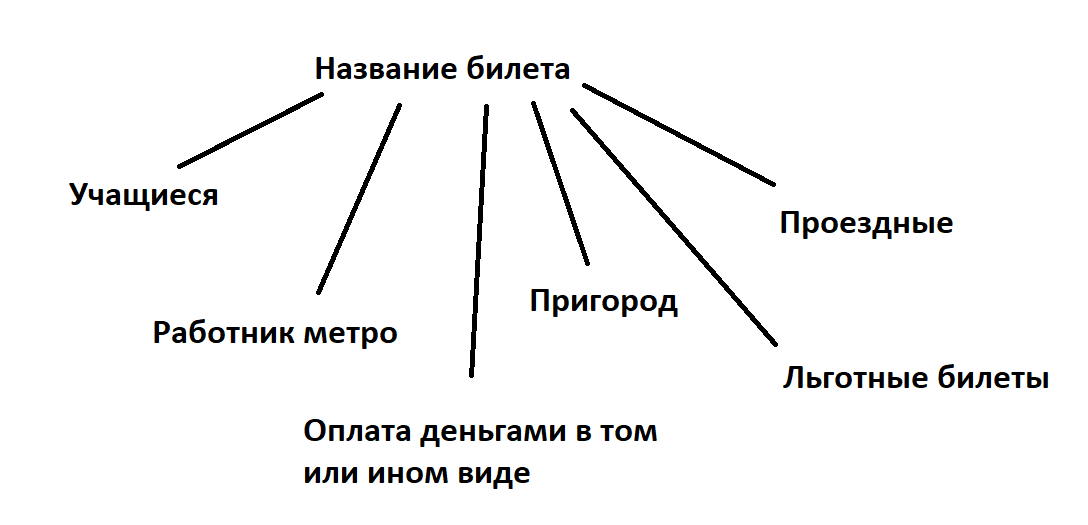

● Учащиеся - 'СК студента 30 дней', 'СК учащегося 30 дней', '30 дней СК учащегося', '90 дней СК студента', '30 дней СК студента', 'СК ординатора 90 дней', 'СК аспиранта 90 дней', 'СК учащегося 90 дней', 'СК аспиранта 30 дней', '90 дней СК учащегося', 'СК ординатора 30 дней', '30 дней СК аспиранта', '30 дней СК ординатора', '90 дней СК ординатора', 'СК студента 90 дней', '90 дней СК аспиранта',

● Работник метро - 'Пропуск сотрудника УВД по охране Метрополитена', 'Пропуск сотрудника МЦК', 'Пропуск руководителя метрополитена', 'Пропуск сотрудника метрополитена', 'СК ассистента-стажера 30 дней', 'СК ассистента-стажера 90 дней', '30 дней СК ассистента-стажера'

● Деньги - 'Пропуск FacePay', 'КОШЕЛЕК', 'Безналичная транспортная карта'

● Пригород - '1 сутки Пригород ТК', '90 дней Пригород', '365 дней Пригород', '30 дней Пригород', '90 дней Пригород ТК', '30 дней Пригород ТК', '365 дней Пригород ТК', 'ББК'

● Проездные - '30 дней', '90 дней', '30 дней ЕДИНЫЙ ТК', '60 поездок ЕДИНЫЙ ТК', '365 дней ЕДИНЫЙ ТК' , '365 дней', '3 суток Единый ТК', '1 сутки ЕДИНЫЙ ТК', 'Ультралайт Единый (70)', 'Билет 3 суток ЕДИНЫЙ', 'Билет 3 суток ЕДИНЫЙ', '90 дней ЕДИНЫЙ ТК', 'Билет 1 сутки ЕДИНЫЙ'

● Льготные - 'Социальная карта жителя Моск. области с сопровождающим', 'Социальная карта жителя Моск. области', 'Социальная карта москвича с сопровождающим', 'Социальная карта москвича', 'БСК дружинника г.Москвы', 'СК для сотрудника ГУВД г.Москвы', 'ВЛБ МОСКВА', 'ВЕСБ МО с сопровождающим', 'ВЕСБ МОСКВА (7мин)', 'ВЕСБ МО (тип 5)', 'ВЕСБ МО (тип 6)', 'ВЕСБ МОСКВА', 'ВЕСБ МО (7 мин)', 'Временный билет ММ'


In [14]:
subway_worker = ['Пропуск сотрудника УВД по охране Метрополитена', 'Пропуск  сотрудника МЦК', 'Пропуск руководителя метрополитена', 'Пропуск сотрудника  метрополитена', 'СК ассистента-стажера 30 дней', 'СК ассистента-стажера 90 дней', '30 дней СК ассистента-стажера']
by_money = [ 'Пропуск FacePay', 'КОШЕЛЕК', 'Безналичная транспортная карта']
student = ['СК студента 30 дней', 'СК учащегося 30 дней', '30 дней СК учащегося', '90 дней СК студента', '30 дней СК студента', 'СК ординатора 90 дней', 'СК аспиранта 90 дней', 'СК учащегося 90 дней', 'СК аспиранта 30 дней', '90 дней СК учащегося', 'СК ординатора 30 дней', '30 дней СК аспиранта', '30 дней СК ординатора', '90 дней СК ординатора', 'СК студента 90 дней', '90 дней СК аспиранта']
suburb = ['1 сутки Пригород ТК', '90 дней  Пригород', '365 дней  Пригород', '30 дней  Пригород', '90 дней Пригород ТК', '30 дней Пригород ТК', '365 дней Пригород ТК', 'ББК']
concession_ticket = ['Социальная карта жителя Моск. области с сопровождающим', 'Социальная карта жителя Моск. области', 'Социальная карта москвича с сопровождающим', 'Социальная карта москвича', 'БСК дружинника г.Москвы', 'СК для сотрудника ГУВД г.Москвы', 'ВЛБ МОСКВА', 'ВЕСБ МО с сопровождающим', 'ВЕСБ МОСКВА (7мин)', 'ВЕСБ МО (тип 5)', 'ВЕСБ МО (тип 6)', 'ВЕСБ МОСКВА', 'ВЕСБ МО (7 мин)', 'Временный билет ММ']
travel_ticket = ['30 дней', '90 дней', '30 дней ЕДИНЫЙ ТК', '60 поездок ЕДИНЫЙ ТК', '365 дней ЕДИНЫЙ ТК' , '365 дней', '3 суток Единый ТК', '1 сутки ЕДИНЫЙ ТК', 'Ультралайт Единый (70)', 'Билет 3 суток ЕДИНЫЙ', '90 дней ЕДИНЫЙ ТК', 'Билет 1 сутки ЕДИНЫЙ']

In [15]:
# df.loc[df.ticket_type_nm.isin(subway_worker)].mask(df.ticket_type_nm.isin(subway_worker), 'subway_worker', inplace=True)

In [16]:
# Проверка на корректность типов билетов
set(df.loc[df.ticket_type_nm.isin(by_money)].ticket_type_nm.unique()) ^ set(by_money)


set()

In [17]:
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(subway_worker), 'subway_worker', inplace=True)
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(by_money), 'by_money', inplace=True)
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(student), 'student', inplace=True)
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(suburb), 'suburb', inplace=True)
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(concession_ticket), 'concession_ticket', inplace=True)
df['ticket_type_nm'].mask(df.ticket_type_nm.isin(travel_ticket ), 'travel_ticket', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091021 entries, 0 to 1091020
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ticket_type_nm  1091021 non-null  object 
 1   station_nm      1091021 non-null  object 
 2   line_nm         1091021 non-null  object 
 3   time_to_under   1091021 non-null  float64
 4   label           1091021 non-null  int64  
 5   dayofweek       1091021 non-null  int64  
 6   hour            1091021 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 58.3+ MB


In [19]:
df

,ticket_type_nm,station_nm,line_nm,time_to_under,label,dayofweek,hour
0,by_money,Лефортово,Большая кольцевая,216.316667,8001,0,5
1,student,Войковская,Замоскворецкая,648.183333,9011,0,5
2,concession_ticket,Войковская,Замоскворецкая,865.333333,7022,0,5
3,travel_ticket,Войковская,Замоскворецкая,1048.233333,2022,0,5
4,by_money,Войковская,Замоскворецкая,965.600000,2017,0,5
...,...,...,...,...,...,...,...
1091016,by_money,Нижегородская,Некрасовская,124.750000,15005,0,2
1091017,by_money,Калужская,Калужско-Рижская,56.066667,6007,0,3
1091018,by_money,Каширская,Замоскворецкая,91.283333,2010,0,3
1091019,by_money,Воронцовская,Большая кольцевая,47.900000,11014,0,3


# Linear regression

Будем решать задачу о поиске времени, затрачиваемого на маршрут с помощью линеной регрессии.

In [25]:
# x_regress_train, x_regress_test, y_regress_train, y_regress_test = train_test_split(df.drop(columns=['time_to_under']), df[['time_to_under']], test_size=0.3)


# pipe_regression = Pipeline(steps=[('model', CatBoostRegressor(cat_features=['ticket_type_nm', 'station_nm','line_nm']))])
# pipe_regression.fit(x_regress_train, y_regress_train)
# forecast_regress = pipe_regression.predict(x_regress_test)


Learning rate set to 0.116865
0:	learn: 219.8126039	total: 341ms	remaining: 5m 40s
1:	learn: 209.0513191	total: 541ms	remaining: 4m 30s
2:	learn: 200.2454184	total: 649ms	remaining: 3m 35s
3:	learn: 193.0599222	total: 824ms	remaining: 3m 25s
4:	learn: 187.1992066	total: 983ms	remaining: 3m 15s
5:	learn: 182.4516131	total: 1.11s	remaining: 3m 4s
6:	learn: 178.4685557	total: 1.26s	remaining: 2m 59s
7:	learn: 175.3734757	total: 1.41s	remaining: 2m 54s
8:	learn: 172.7905499	total: 1.57s	remaining: 2m 53s
9:	learn: 170.7158791	total: 1.74s	remaining: 2m 52s
10:	learn: 169.0640235	total: 1.92s	remaining: 2m 52s
11:	learn: 167.6910169	total: 2.05s	remaining: 2m 49s
12:	learn: 166.6209412	total: 2.18s	remaining: 2m 45s
13:	learn: 165.7417794	total: 2.35s	remaining: 2m 45s
14:	learn: 165.0517589	total: 2.52s	remaining: 2m 45s
15:	learn: 164.5024972	total: 2.7s	remaining: 2m 46s
16:	learn: 164.0135275	total: 2.86s	remaining: 2m 45s
17:	learn: 163.6355341	total: 3.04s	remaining: 2m 46s
18:	learn:

151:	learn: 159.1545576	total: 28.1s	remaining: 2m 36s
152:	learn: 159.1314511	total: 28.3s	remaining: 2m 36s
153:	learn: 159.1267143	total: 28.5s	remaining: 2m 36s
154:	learn: 159.1179911	total: 28.7s	remaining: 2m 36s
155:	learn: 159.0996027	total: 28.9s	remaining: 2m 36s
156:	learn: 159.0897186	total: 29.2s	remaining: 2m 36s
157:	learn: 159.0832319	total: 29.4s	remaining: 2m 36s
158:	learn: 159.0782346	total: 29.6s	remaining: 2m 36s
159:	learn: 159.0698511	total: 29.8s	remaining: 2m 36s
160:	learn: 159.0595355	total: 29.9s	remaining: 2m 36s
161:	learn: 159.0529286	total: 30.1s	remaining: 2m 35s
162:	learn: 159.0440351	total: 30.3s	remaining: 2m 35s
163:	learn: 159.0355473	total: 30.5s	remaining: 2m 35s
164:	learn: 159.0311964	total: 30.7s	remaining: 2m 35s
165:	learn: 159.0250921	total: 30.9s	remaining: 2m 35s
166:	learn: 159.0205897	total: 31s	remaining: 2m 34s
167:	learn: 159.0151182	total: 31.2s	remaining: 2m 34s
168:	learn: 159.0098040	total: 31.4s	remaining: 2m 34s
169:	learn: 

302:	learn: 158.1167486	total: 55.5s	remaining: 2m 7s
303:	learn: 158.1141367	total: 55.6s	remaining: 2m 7s
304:	learn: 158.1124205	total: 55.9s	remaining: 2m 7s
305:	learn: 158.1075951	total: 56.1s	remaining: 2m 7s
306:	learn: 158.1024320	total: 56.3s	remaining: 2m 7s
307:	learn: 158.0976455	total: 56.5s	remaining: 2m 6s
308:	learn: 158.0938133	total: 56.7s	remaining: 2m 6s
309:	learn: 158.0862461	total: 56.9s	remaining: 2m 6s
310:	learn: 158.0838782	total: 57.1s	remaining: 2m 6s
311:	learn: 158.0798450	total: 57.3s	remaining: 2m 6s
312:	learn: 158.0760161	total: 57.4s	remaining: 2m 6s
313:	learn: 158.0721496	total: 57.6s	remaining: 2m 5s
314:	learn: 158.0707425	total: 57.8s	remaining: 2m 5s
315:	learn: 158.0604207	total: 58s	remaining: 2m 5s
316:	learn: 158.0551094	total: 58.2s	remaining: 2m 5s
317:	learn: 158.0510660	total: 58.4s	remaining: 2m 5s
318:	learn: 158.0475920	total: 58.5s	remaining: 2m 4s
319:	learn: 158.0332929	total: 58.7s	remaining: 2m 4s
320:	learn: 158.0302021	total:

453:	learn: 157.5310811	total: 1m 22s	remaining: 1m 39s
454:	learn: 157.5270559	total: 1m 22s	remaining: 1m 39s
455:	learn: 157.5255652	total: 1m 22s	remaining: 1m 39s
456:	learn: 157.5235538	total: 1m 23s	remaining: 1m 38s
457:	learn: 157.5215528	total: 1m 23s	remaining: 1m 38s
458:	learn: 157.5173211	total: 1m 23s	remaining: 1m 38s
459:	learn: 157.5143222	total: 1m 23s	remaining: 1m 38s
460:	learn: 157.5104831	total: 1m 23s	remaining: 1m 37s
461:	learn: 157.5065002	total: 1m 23s	remaining: 1m 37s
462:	learn: 157.5020752	total: 1m 24s	remaining: 1m 37s
463:	learn: 157.4993475	total: 1m 24s	remaining: 1m 37s
464:	learn: 157.4971600	total: 1m 24s	remaining: 1m 37s
465:	learn: 157.4941652	total: 1m 24s	remaining: 1m 36s
466:	learn: 157.4937813	total: 1m 24s	remaining: 1m 36s
467:	learn: 157.4918875	total: 1m 24s	remaining: 1m 36s
468:	learn: 157.4889397	total: 1m 25s	remaining: 1m 36s
469:	learn: 157.4831119	total: 1m 25s	remaining: 1m 36s
470:	learn: 157.4810665	total: 1m 25s	remaining:

601:	learn: 157.1121711	total: 1m 49s	remaining: 1m 12s
602:	learn: 157.1109130	total: 1m 49s	remaining: 1m 12s
603:	learn: 157.1102287	total: 1m 49s	remaining: 1m 11s
604:	learn: 157.1069564	total: 1m 49s	remaining: 1m 11s
605:	learn: 157.1052040	total: 1m 50s	remaining: 1m 11s
606:	learn: 157.1020595	total: 1m 50s	remaining: 1m 11s
607:	learn: 157.0973369	total: 1m 50s	remaining: 1m 11s
608:	learn: 157.0950039	total: 1m 50s	remaining: 1m 11s
609:	learn: 157.0915427	total: 1m 50s	remaining: 1m 10s
610:	learn: 157.0908901	total: 1m 50s	remaining: 1m 10s
611:	learn: 157.0869186	total: 1m 51s	remaining: 1m 10s
612:	learn: 157.0823728	total: 1m 51s	remaining: 1m 10s
613:	learn: 157.0798123	total: 1m 51s	remaining: 1m 10s
614:	learn: 157.0765079	total: 1m 51s	remaining: 1m 9s
615:	learn: 157.0738227	total: 1m 51s	remaining: 1m 9s
616:	learn: 157.0701800	total: 1m 51s	remaining: 1m 9s
617:	learn: 157.0700627	total: 1m 52s	remaining: 1m 9s
618:	learn: 157.0671996	total: 1m 52s	remaining: 1m 

753:	learn: 156.8014069	total: 2m 16s	remaining: 44.5s
754:	learn: 156.8009370	total: 2m 16s	remaining: 44.3s
755:	learn: 156.7986642	total: 2m 16s	remaining: 44.1s
756:	learn: 156.7954808	total: 2m 16s	remaining: 43.9s
757:	learn: 156.7933539	total: 2m 16s	remaining: 43.7s
758:	learn: 156.7909474	total: 2m 17s	remaining: 43.6s
759:	learn: 156.7898959	total: 2m 17s	remaining: 43.4s
760:	learn: 156.7859787	total: 2m 17s	remaining: 43.2s
761:	learn: 156.7858579	total: 2m 17s	remaining: 43s
762:	learn: 156.7846022	total: 2m 17s	remaining: 42.8s
763:	learn: 156.7835801	total: 2m 18s	remaining: 42.7s
764:	learn: 156.7797729	total: 2m 18s	remaining: 42.5s
765:	learn: 156.7773904	total: 2m 18s	remaining: 42.3s
766:	learn: 156.7756405	total: 2m 18s	remaining: 42.1s
767:	learn: 156.7732952	total: 2m 18s	remaining: 41.9s
768:	learn: 156.7728951	total: 2m 18s	remaining: 41.7s
769:	learn: 156.7703094	total: 2m 19s	remaining: 41.6s
770:	learn: 156.7688722	total: 2m 19s	remaining: 41.4s
771:	learn: 

904:	learn: 156.5348991	total: 2m 43s	remaining: 17.1s
905:	learn: 156.5344824	total: 2m 43s	remaining: 17s
906:	learn: 156.5340443	total: 2m 43s	remaining: 16.8s
907:	learn: 156.5339188	total: 2m 43s	remaining: 16.6s
908:	learn: 156.5337522	total: 2m 44s	remaining: 16.4s
909:	learn: 156.5327231	total: 2m 44s	remaining: 16.2s
910:	learn: 156.5323673	total: 2m 44s	remaining: 16.1s
911:	learn: 156.5295830	total: 2m 44s	remaining: 15.9s
912:	learn: 156.5278375	total: 2m 44s	remaining: 15.7s
913:	learn: 156.5246671	total: 2m 44s	remaining: 15.5s
914:	learn: 156.5230056	total: 2m 45s	remaining: 15.3s
915:	learn: 156.5215447	total: 2m 45s	remaining: 15.2s
916:	learn: 156.5206998	total: 2m 45s	remaining: 15s
917:	learn: 156.5190515	total: 2m 45s	remaining: 14.8s
918:	learn: 156.5173043	total: 2m 45s	remaining: 14.6s
919:	learn: 156.5153128	total: 2m 46s	remaining: 14.4s
920:	learn: 156.5149468	total: 2m 46s	remaining: 14.3s
921:	learn: 156.5139390	total: 2m 46s	remaining: 14.1s
922:	learn: 15

# Classification

In [26]:
# x_train_class = df.drop(columns=['label'])[:600]
# y_train_class = df[['label']][:600]

# test_class = df.loc[df.ticket_type_nm.isin(x_train_class.ticket_type_nm)&
#                     df.station_nm.isin(x_train_class.station_nm) &
#                     df.line_nm.isin(x_train_class.line_nm) ]

# x_test_class = test_class.drop(columns=['label'])[:180]
# y_test_class = test_class[['label']][:180]

# pipe_multiclass = Pipeline(steps=[('model', CatBoostClassifier(cat_features=['ticket_type_nm', 'station_nm','line_nm']))])
# pipe_multiclass.fit(x_train_class, y_train_class)
# forecast_class = pipe_multiclass.predict(x_test_class)

Learning rate set to 0.077092
0:	learn: 5.2834347	total: 3.25s	remaining: 54m 5s
1:	learn: 5.2524016	total: 6.48s	remaining: 53m 52s
2:	learn: 5.2246126	total: 9.91s	remaining: 54m 54s
3:	learn: 5.1922014	total: 13.6s	remaining: 56m 31s
4:	learn: 5.1673632	total: 17s	remaining: 56m 30s
5:	learn: 5.1418646	total: 20.3s	remaining: 55m 56s
6:	learn: 5.1164272	total: 23.6s	remaining: 55m 53s
7:	learn: 5.0930523	total: 27.2s	remaining: 56m 7s
8:	learn: 5.0636957	total: 30.7s	remaining: 56m 19s
9:	learn: 5.0404099	total: 34.2s	remaining: 56m 23s
10:	learn: 5.0121438	total: 37.7s	remaining: 56m 33s
11:	learn: 4.9853050	total: 41.2s	remaining: 56m 33s
12:	learn: 4.9561093	total: 44.8s	remaining: 56m 44s
13:	learn: 4.9246054	total: 48.5s	remaining: 56m 54s
14:	learn: 4.9023532	total: 52s	remaining: 56m 55s
15:	learn: 4.8737493	total: 55.4s	remaining: 56m 49s
16:	learn: 4.8441255	total: 59s	remaining: 56m 54s
17:	learn: 4.8157015	total: 1m 2s	remaining: 56m 47s
18:	learn: 4.7896661	total: 1m 6s	

152:	learn: 2.7273926	total: 9m 49s	remaining: 54m 22s
153:	learn: 2.7155631	total: 9m 53s	remaining: 54m 20s
154:	learn: 2.7053840	total: 9m 56s	remaining: 54m 14s
155:	learn: 2.6988556	total: 10m	remaining: 54m 11s
156:	learn: 2.6873746	total: 10m 5s	remaining: 54m 8s
157:	learn: 2.6834281	total: 10m 10s	remaining: 54m 14s
158:	learn: 2.6708324	total: 10m 15s	remaining: 54m 16s
159:	learn: 2.6633980	total: 10m 19s	remaining: 54m 11s
160:	learn: 2.6527322	total: 10m 24s	remaining: 54m 16s
161:	learn: 2.6420600	total: 10m 29s	remaining: 54m 18s
162:	learn: 2.6348454	total: 10m 35s	remaining: 54m 24s
163:	learn: 2.6283741	total: 10m 40s	remaining: 54m 24s
164:	learn: 2.6271783	total: 10m 44s	remaining: 54m 20s
165:	learn: 2.6195853	total: 10m 48s	remaining: 54m 17s
166:	learn: 2.6129930	total: 10m 52s	remaining: 54m 14s
167:	learn: 2.6004176	total: 10m 56s	remaining: 54m 12s
168:	learn: 2.5919542	total: 11m 2s	remaining: 54m 16s
169:	learn: 2.5848924	total: 11m 6s	remaining: 54m 14s
170

300:	learn: 1.5483210	total: 20m 20s	remaining: 47m 15s
301:	learn: 1.5404065	total: 20m 26s	remaining: 47m 14s
302:	learn: 1.5314508	total: 20m 31s	remaining: 47m 13s
303:	learn: 1.5216444	total: 20m 35s	remaining: 47m 8s
304:	learn: 1.5160406	total: 20m 39s	remaining: 47m 3s
305:	learn: 1.5098947	total: 20m 42s	remaining: 46m 58s
306:	learn: 1.5031019	total: 20m 46s	remaining: 46m 54s
307:	learn: 1.4951827	total: 20m 50s	remaining: 46m 49s
308:	learn: 1.4907644	total: 20m 56s	remaining: 46m 50s
309:	learn: 1.4857902	total: 21m	remaining: 46m 45s
310:	learn: 1.4809061	total: 21m 4s	remaining: 46m 41s
311:	learn: 1.4754092	total: 21m 7s	remaining: 46m 35s
312:	learn: 1.4725833	total: 21m 11s	remaining: 46m 30s
313:	learn: 1.4633526	total: 21m 15s	remaining: 46m 26s
314:	learn: 1.4551337	total: 21m 20s	remaining: 46m 23s
315:	learn: 1.4471196	total: 21m 23s	remaining: 46m 18s
316:	learn: 1.4429268	total: 21m 27s	remaining: 46m 13s
317:	learn: 1.4368849	total: 21m 30s	remaining: 46m 8s
3

448:	learn: 0.8432302	total: 30m 33s	remaining: 37m 29s
449:	learn: 0.8407569	total: 30m 37s	remaining: 37m 26s
450:	learn: 0.8378478	total: 30m 41s	remaining: 37m 21s
451:	learn: 0.8343973	total: 30m 45s	remaining: 37m 17s
452:	learn: 0.8305964	total: 30m 50s	remaining: 37m 14s
453:	learn: 0.8259576	total: 30m 54s	remaining: 37m 10s
454:	learn: 0.8223689	total: 30m 59s	remaining: 37m 7s
455:	learn: 0.8180550	total: 31m 3s	remaining: 37m 2s
456:	learn: 0.8139516	total: 31m 7s	remaining: 36m 59s
457:	learn: 0.8108842	total: 31m 11s	remaining: 36m 55s
458:	learn: 0.8081365	total: 31m 16s	remaining: 36m 51s
459:	learn: 0.8052388	total: 31m 19s	remaining: 36m 46s
460:	learn: 0.8012953	total: 31m 23s	remaining: 36m 42s
461:	learn: 0.7993872	total: 31m 27s	remaining: 36m 38s
462:	learn: 0.7969930	total: 31m 31s	remaining: 36m 34s
463:	learn: 0.7956586	total: 31m 35s	remaining: 36m 29s
464:	learn: 0.7935192	total: 31m 39s	remaining: 36m 26s
465:	learn: 0.7931620	total: 31m 44s	remaining: 36m 

596:	learn: 0.4954921	total: 41m 11s	remaining: 27m 48s
597:	learn: 0.4946853	total: 41m 15s	remaining: 27m 44s
598:	learn: 0.4935558	total: 41m 20s	remaining: 27m 40s
599:	learn: 0.4924241	total: 41m 24s	remaining: 27m 36s
600:	learn: 0.4906780	total: 41m 28s	remaining: 27m 32s
601:	learn: 0.4893489	total: 41m 34s	remaining: 27m 29s
602:	learn: 0.4873531	total: 41m 38s	remaining: 27m 24s
603:	learn: 0.4855310	total: 41m 42s	remaining: 27m 20s
604:	learn: 0.4839427	total: 41m 46s	remaining: 27m 16s
605:	learn: 0.4821801	total: 41m 51s	remaining: 27m 12s
606:	learn: 0.4809201	total: 41m 56s	remaining: 27m 9s
607:	learn: 0.4800482	total: 42m 3s	remaining: 27m 6s
608:	learn: 0.4784670	total: 42m 8s	remaining: 27m 3s
609:	learn: 0.4773653	total: 42m 12s	remaining: 26m 58s
610:	learn: 0.4762961	total: 42m 17s	remaining: 26m 55s
611:	learn: 0.4743098	total: 42m 21s	remaining: 26m 51s
612:	learn: 0.4734466	total: 42m 25s	remaining: 26m 47s
613:	learn: 0.4718480	total: 42m 31s	remaining: 26m 4

744:	learn: 0.3291948	total: 51m 44s	remaining: 17m 42s
745:	learn: 0.3285000	total: 51m 48s	remaining: 17m 38s
746:	learn: 0.3277144	total: 51m 53s	remaining: 17m 34s
747:	learn: 0.3269374	total: 51m 58s	remaining: 17m 30s
748:	learn: 0.3262003	total: 52m 2s	remaining: 17m 26s
749:	learn: 0.3254517	total: 52m 6s	remaining: 17m 22s
750:	learn: 0.3245058	total: 52m 11s	remaining: 17m 18s
751:	learn: 0.3242303	total: 52m 14s	remaining: 17m 13s
752:	learn: 0.3234419	total: 52m 18s	remaining: 17m 9s
753:	learn: 0.3224880	total: 52m 22s	remaining: 17m 5s
754:	learn: 0.3220561	total: 52m 28s	remaining: 17m 1s
755:	learn: 0.3215456	total: 52m 33s	remaining: 16m 57s
756:	learn: 0.3211478	total: 52m 38s	remaining: 16m 53s
757:	learn: 0.3202436	total: 52m 42s	remaining: 16m 49s
758:	learn: 0.3193819	total: 52m 46s	remaining: 16m 45s
759:	learn: 0.3186188	total: 52m 51s	remaining: 16m 41s
760:	learn: 0.3174772	total: 52m 54s	remaining: 16m 37s
761:	learn: 0.3161483	total: 53m	remaining: 16m 33s
7

892:	learn: 0.2426255	total: 1h 1m 51s	remaining: 7m 24s
893:	learn: 0.2424129	total: 1h 1m 55s	remaining: 7m 20s
894:	learn: 0.2419277	total: 1h 1m 59s	remaining: 7m 16s
895:	learn: 0.2416735	total: 1h 2m 3s	remaining: 7m 12s
896:	learn: 0.2414189	total: 1h 2m 7s	remaining: 7m 8s
897:	learn: 0.2410258	total: 1h 2m 11s	remaining: 7m 3s
898:	learn: 0.2407867	total: 1h 2m 15s	remaining: 6m 59s
899:	learn: 0.2402360	total: 1h 2m 20s	remaining: 6m 55s
900:	learn: 0.2396325	total: 1h 2m 24s	remaining: 6m 51s
901:	learn: 0.2392287	total: 1h 2m 28s	remaining: 6m 47s
902:	learn: 0.2390230	total: 1h 2m 33s	remaining: 6m 43s
903:	learn: 0.2386960	total: 1h 2m 37s	remaining: 6m 39s
904:	learn: 0.2384742	total: 1h 2m 41s	remaining: 6m 34s
905:	learn: 0.2378446	total: 1h 2m 45s	remaining: 6m 30s
906:	learn: 0.2372937	total: 1h 2m 49s	remaining: 6m 26s
907:	learn: 0.2370353	total: 1h 2m 54s	remaining: 6m 22s
908:	learn: 0.2365250	total: 1h 2m 59s	remaining: 6m 18s
909:	learn: 0.2358997	total: 1h 3m 

In [27]:
# from sklearn.metrics import r2_score, recall_score, mean_absolute_percentage_error

# def result(actual_class, forecast_class, actual_regress, forecast_regress):
#     print('recall: ',recall_score(actual_class, forecast_class, average='micro'))
#     print('R2: ',r2_score(actual_regress, forecast_regress))
#     return 0.5 * r2_score(actual_regress, forecast_regress) + 0.5 * recall_score(actual_class, forecast_class, average='micro')


In [28]:
# final = result(y_test_class, forecast_class, y_regress_test, forecast_regress)
# print('result: ', final)

recall:  0.20555555555555555
R2:  0.5444355400902716
result:  0.37499554782291356


# Пробуем поработать с subway.csv 

In [20]:
subway_df = pd.read_csv('C:\\Users\\timur\\Documents\\ML Course\\subway.csv')
subway_df

,Unnamed: 0,global_route_id,route_id,route_num,start_station_id,start_station_nm,start_line_id,start_line_nm,all_stations_id,all_stations_nm,station_cnt,transit_cnt,sector_cnt,alternative_route_cnt,route_dur,optimal_route_delta
0,0,7018_10001,10001_7018,9,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",26,3,4,30,64.59,8.58
1,1,7018_10001,10001_7018,1,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",23,1,2,30,56.01,0.00
2,2,7018_10001,10001_7018,2,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",25,2,3,30,61.01,5.00
3,3,7018_10001,10001_7018,3,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",26,2,3,30,61.81,5.80
4,4,7018_10001,10001_7018,4,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",25,2,3,30,62.01,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991566,2991566,8001_9022,9022_8001,29,9022,Цветной бульвар,9,Серпуховско-Тимирязевская,"[9022,10020,10019,10022,5006,5012,7019,8002,80...","[""Цветной бульвар"",""Трубная"",""Сретенский бульв...",10,4,3,33,27.71,11.30
2991567,2991567,8001_9022,9022_8001,30,9022,Цветной бульвар,9,Серпуховско-Тимирязевская,"[9022,9024,2019,2020,3015,3008,10022,10017,800...","[""Цветной бульвар"",""Чеховская"",""Тверская"",""Теа...",10,4,5,33,27.71,11.30
2991568,2991568,8001_9022,9022_8001,31,9022,Цветной бульвар,9,Серпуховско-Тимирязевская,"[9022,10020,10019,1021,6022,6008,7006,7019,800...","[""Цветной бульвар"",""Трубная"",""Сретенский бульв...",11,5,4,33,27.71,11.30
2991569,2991569,8001_9022,9022_8001,32,9022,Цветной бульвар,9,Серпуховско-Тимирязевская,"[9022,9024,7015,7008,7006,6008,6022,10019,1002...","[""Цветной бульвар"",""Чеховская"",""Пушкинская"",""К...",12,4,5,33,27.81,11.40


In [24]:
subway_df.all_stations_nm[1]

'["Борисово","Марьино","Братиславская","Люблино","Волжская","Печатники","Кожуховская","Дубровка","Крестьянская застава","Пролетарская","Таганская","Китай-город","Кузнецкий мост","Пушкинская","Баррикадная","Улица 1905 года","Беговая","Полежаевская","Октябрьское поле","Щукинская","Спартак","Тушинская","Сходненская"]'

In [25]:
len(subway_df.start_line_nm.unique())

18

Какие выводы? Можно было бы оставить данные по линии метро и воспользоваться энкодером конкретно по линиям метро. Label придется оставить как есть. Любой станции вместо имени можно оставить ветку, на которой она находится и передать некоторое числовое значение, которое бы показывало удаление этой станции от центра (на север +, на юг -). Тем самым мы бы избавились от названия станций. Итого - увеличим энкодером таблицу в 6(группировка по типам билета) + 18(количество веток) = 24. То есть исходная табличка будет весить в 24 раза больше - примерно 700 мб, что уже гораздо лучше, чем 500 гигабайт. В таком случае можно было бы добавить из сабвэй некоторое усредненное значение по длине маршрута, мб оно тоже как то сыграет роль.